In [1]:
#Import Libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [2]:
#Loading  Dataset
df = pd.read_csv("house Prediction Data Set.csv", sep="\s+", header=None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273.0,21.0,396.90,7.88,11.9


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       506 non-null    float64
 1   1       506 non-null    float64
 2   2       506 non-null    float64
 3   3       506 non-null    int64  
 4   4       506 non-null    float64
 5   5       506 non-null    float64
 6   6       506 non-null    float64
 7   7       506 non-null    float64
 8   8       506 non-null    int64  
 9   9       506 non-null    float64
 10  10      506 non-null    float64
 11  11      506 non-null    float64
 12  12      506 non-null    float64
 13  13      506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [27]:
duplicates = df.duplicated()
print("Number of duplicate rows:", duplicates.sum())

Number of duplicate rows: 0


In [6]:
df.columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], dtype='int64')

In [7]:
#Assign Column Names
columns = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE",
    "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"
]

In [8]:
df.columns = columns
print(df.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [9]:
#Confirming  Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [10]:
#Checking  Missing Values
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [11]:
#Spliting  Features and Target
X = df.drop("MEDV", axis=1)
y = df["MEDV"]

In [12]:
#Standardize Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y,
    test_size=0.2,
    random_state=42
)


In [14]:
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (404, 13)
Test shape: (102, 13)


In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [16]:
X = df.drop("MEDV", axis=1)
y = df["MEDV"]


In [17]:
#Training  Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [18]:
# Making  Predictions
y_pred = model.predict(X_test)

In [19]:
y_pred

array([28.99672362, 36.02556534, 14.81694405, 25.03197915, 18.76987992,
       23.25442929, 17.66253818, 14.34119   , 23.01320703, 20.63245597,
       24.90850512, 18.63883645, -6.08842184, 21.75834668, 19.23922576,
       26.19319733, 20.64773313,  5.79472718, 40.50033966, 17.61289074,
       27.24909479, 30.06625441, 11.34179277, 24.16077616, 17.86058499,
       15.83609765, 22.78148106, 14.57704449, 22.43626052, 19.19631835,
       22.43383455, 25.21979081, 25.93909562, 17.70162434, 16.76911711,
       16.95125411, 31.23340153, 20.13246729, 23.76579011, 24.6322925 ,
       13.94204955, 32.25576301, 42.67251161, 17.32745046, 27.27618614,
       16.99310991, 14.07009109, 25.90341861, 20.29485982, 29.95339638,
       21.28860173, 34.34451856, 16.04739105, 26.22562412, 39.53939798,
       22.57950697, 18.84531367, 32.72531661, 25.0673037 , 12.88628956,
       22.68221908, 30.48287757, 31.52626806, 15.90148607, 20.22094826,
       16.71089812, 20.52384893, 25.96356264, 30.61607978, 11.59

In [20]:
# Evaluating the  Model

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Mean Squared Error: 24.291119474973517
R-squared Score: 0.668759493535632


In [26]:
rmse = np.sqrt(24.291119474973517)
rmse

4.928602182665336

In [21]:
# Interpreting  Model Coefficients
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
}).sort_values(by="Coefficient", ascending=False)

print(coefficients)

    Feature  Coefficient
5        RM     3.115718
8       RAD     2.282785
11        B     1.126499
3      CHAS     0.706532
1        ZN     0.701556
2     INDUS     0.276752
6       AGE    -0.177060
0      CRIM    -0.971494
9       TAX    -1.792605
10  PTRATIO    -1.979954
4       NOX    -1.991430
7       DIS    -3.045771
12    LSTAT    -3.628149


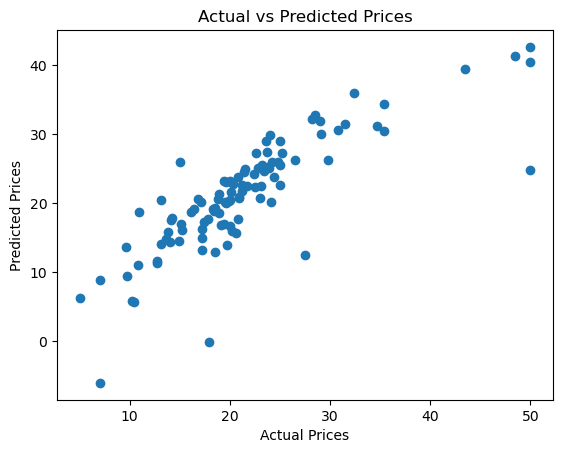

In [25]:
# Visual Check
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()